In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
from src.preprocessing import adaptive_global_thresholding, extract_veins

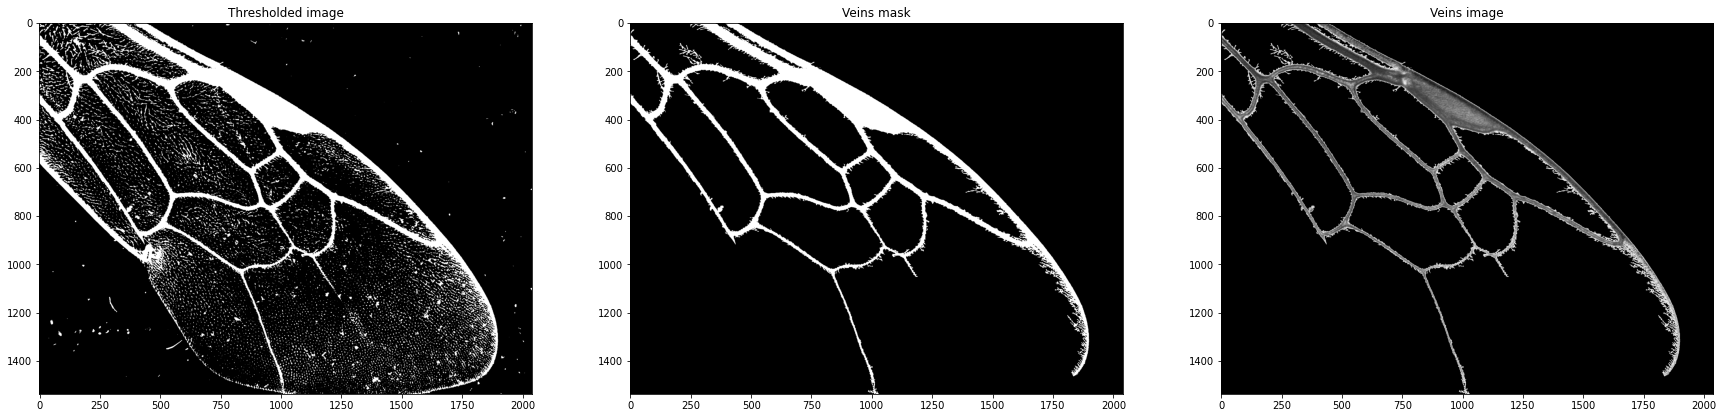

In [24]:
img = read_img('/home/jenntedra/Documents/epita/tifo/tifo/data/1 Lasioglossum leucozonium f right 3.2x.jpg')

filtered = adaptive_global_thresholding(img)
veins_mask = extract_veins(filtered) != 0
img[~veins_mask] = 0

plt.figure(figsize=(30,30))

plt.subplot(131)
plt.title('Thresholded image')
plt.imshow(filtered, cmap='gray')

plt.subplot(132)
plt.title('Veins mask')
plt.imshow(veins, cmap='gray')

plt.subplot(133)
plt.title('Veins image')
plt.imshow(img, cmap='gray')

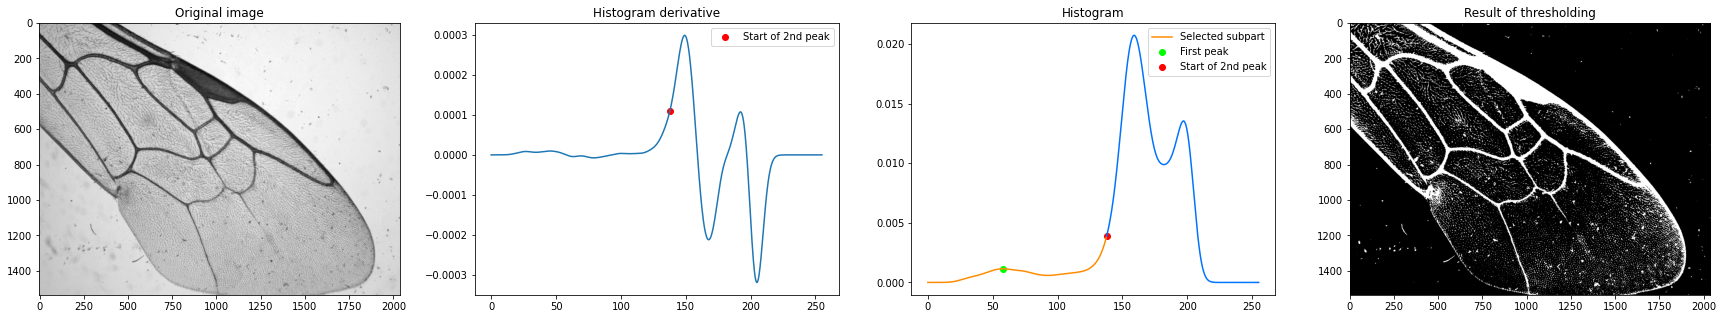

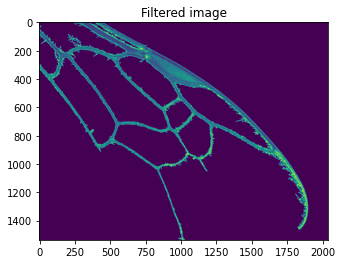

In [35]:
img, hog_img, fd, gt, blocks_bounds = hog.hog_data('/home/jenntedra/Documents/epita/tifo/tifo/data/1 Lasioglossum leucozonium f right 3.2x', (16,16), (7,7), True, mode='train')

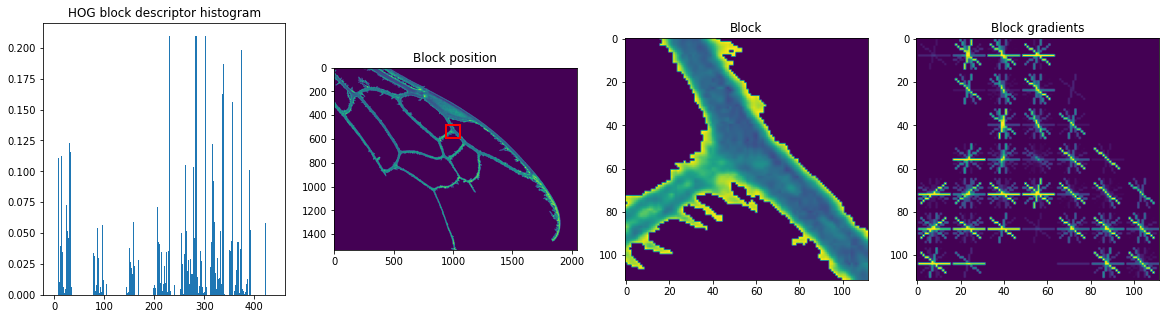

In [38]:
hog.plot_hog_data(img, hog_img, fd, blocks_bounds, np.where(gt == 1)[0][10])

## Classifier with HOG descriptors

In [12]:
from joblib import dump
from sklearn.svm import SVC
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

import src.hog as hog
from src.utils import train_test_split, score, read_img, plot_pts

In [3]:
files = [os.path.splitext(os.path.basename(fn))[0] for fn in glob.glob('data/*.jpg')]
pix_per_cell = (16, 16)

### Train a classifier and test its performance

In [4]:
test_files, train_files = train_test_split(files)
len(test_files + train_files) == len(files) and set(test_files) != set(train_files)

True

In [7]:
x_train_tot, y_train_tot, _ = hog.create_hog_dataset(train_files, pix_per_cell)
x_train_tot = np.concatenate(x_train_tot)
y_train_tot = np.concatenate(y_train_tot)
x_train, y_train = hog.select_subset(x_train_tot, y_train_tot)

x_test, y_test, blocks_bounds = hog.create_hog_dataset(test_files, pix_per_cell)

In [8]:
clf = SVC().fit(x_train, y_train)

In [13]:
for i, fn in enumerate(test_files):
    
    img = read_img(f'data/{fn}.jpg')    
    true = pd.read_csv(f'data/{fn}.csv')
    true_pts = list(true.itertuples(name=None, index=False))
    
    pred_pts = hog.predict(clf, x_test[i], blocks_bounds[i], overlap_threshold=2*pix_per_cell[0])

    plt.figure(figsize=(30, 30))

    ax = plt.subplot(121)
    plt.title('Predictions')
    plot_pts(img, pred_pts)

    ax = plt.subplot(122)
    plt.title('Ground truth')
    plot_pts(img, true_pts)

    plt.savefig('plots/' + fn + '_results.png')
    plt.close()

    score(true_pts, pred_pts)
    print()

Precision : 0.938
Recall : 0.682
F1 score : 0.789

Precision : 0.667
Recall : 0.727
F1 score : 0.696

Precision : 0.750
Recall : 0.450
F1 score : 0.563

Precision : 0.857
Recall : 0.545
F1 score : 0.667

Precision : 0.875
Recall : 0.667
F1 score : 0.757

Precision : 0.889
Recall : 0.727
F1 score : 0.800

Precision : 0.824
Recall : 0.636
F1 score : 0.718

Precision : 1.000
Recall : 0.727
F1 score : 0.842

Precision : 0.933
Recall : 0.636
F1 score : 0.757

Precision : 0.917
Recall : 0.550
F1 score : 0.687

Precision : 0.706
Recall : 0.667
F1 score : 0.686



### Train classifier on all the data and save it to disk

In [14]:
x_tot, y_tot, _ = hog.create_hog_dataset(files, pix_per_cell)
x_tot = np.concatenate(x_tot)
y_tot = np.concatenate(y_tot)
x, y = hog.select_subset(x_tot, y_tot)

final_clf = SVC().fit(x, y)
dump(final_clf, 'model/model.joblib') 

['model/model.joblib']